In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("city_day.csv")

In [4]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [7]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [8]:
df=df.drop('Date',axis=1)
df=df.drop('NO',axis=1)
df=df.drop('NOx',axis=1)
df=df.drop('Benzene',axis=1)
df=df.drop('Toluene',axis=1)
df=df.drop('Xylene',axis=1)
df=df.drop('AQI_Bucket',axis=1)

In [9]:
df.shape

(29531, 9)

In [10]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO2', 'NH3', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')

In [11]:
df["AQI"].value_counts()

AQI
102.0     223
100.0     222
70.0      208
106.0     208
78.0      198
         ... 
1044.0      1
679.0       1
1222.0      1
1459.0      1
13.0        1
Name: count, Length: 829, dtype: int64

<Axes: >

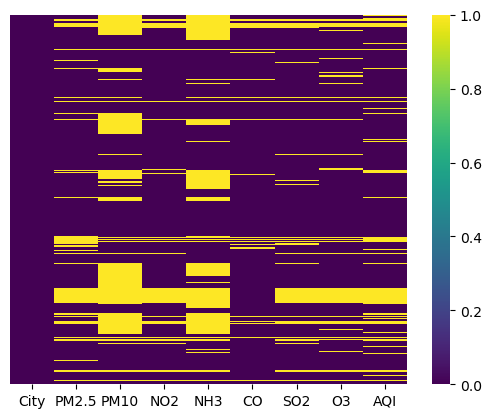

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

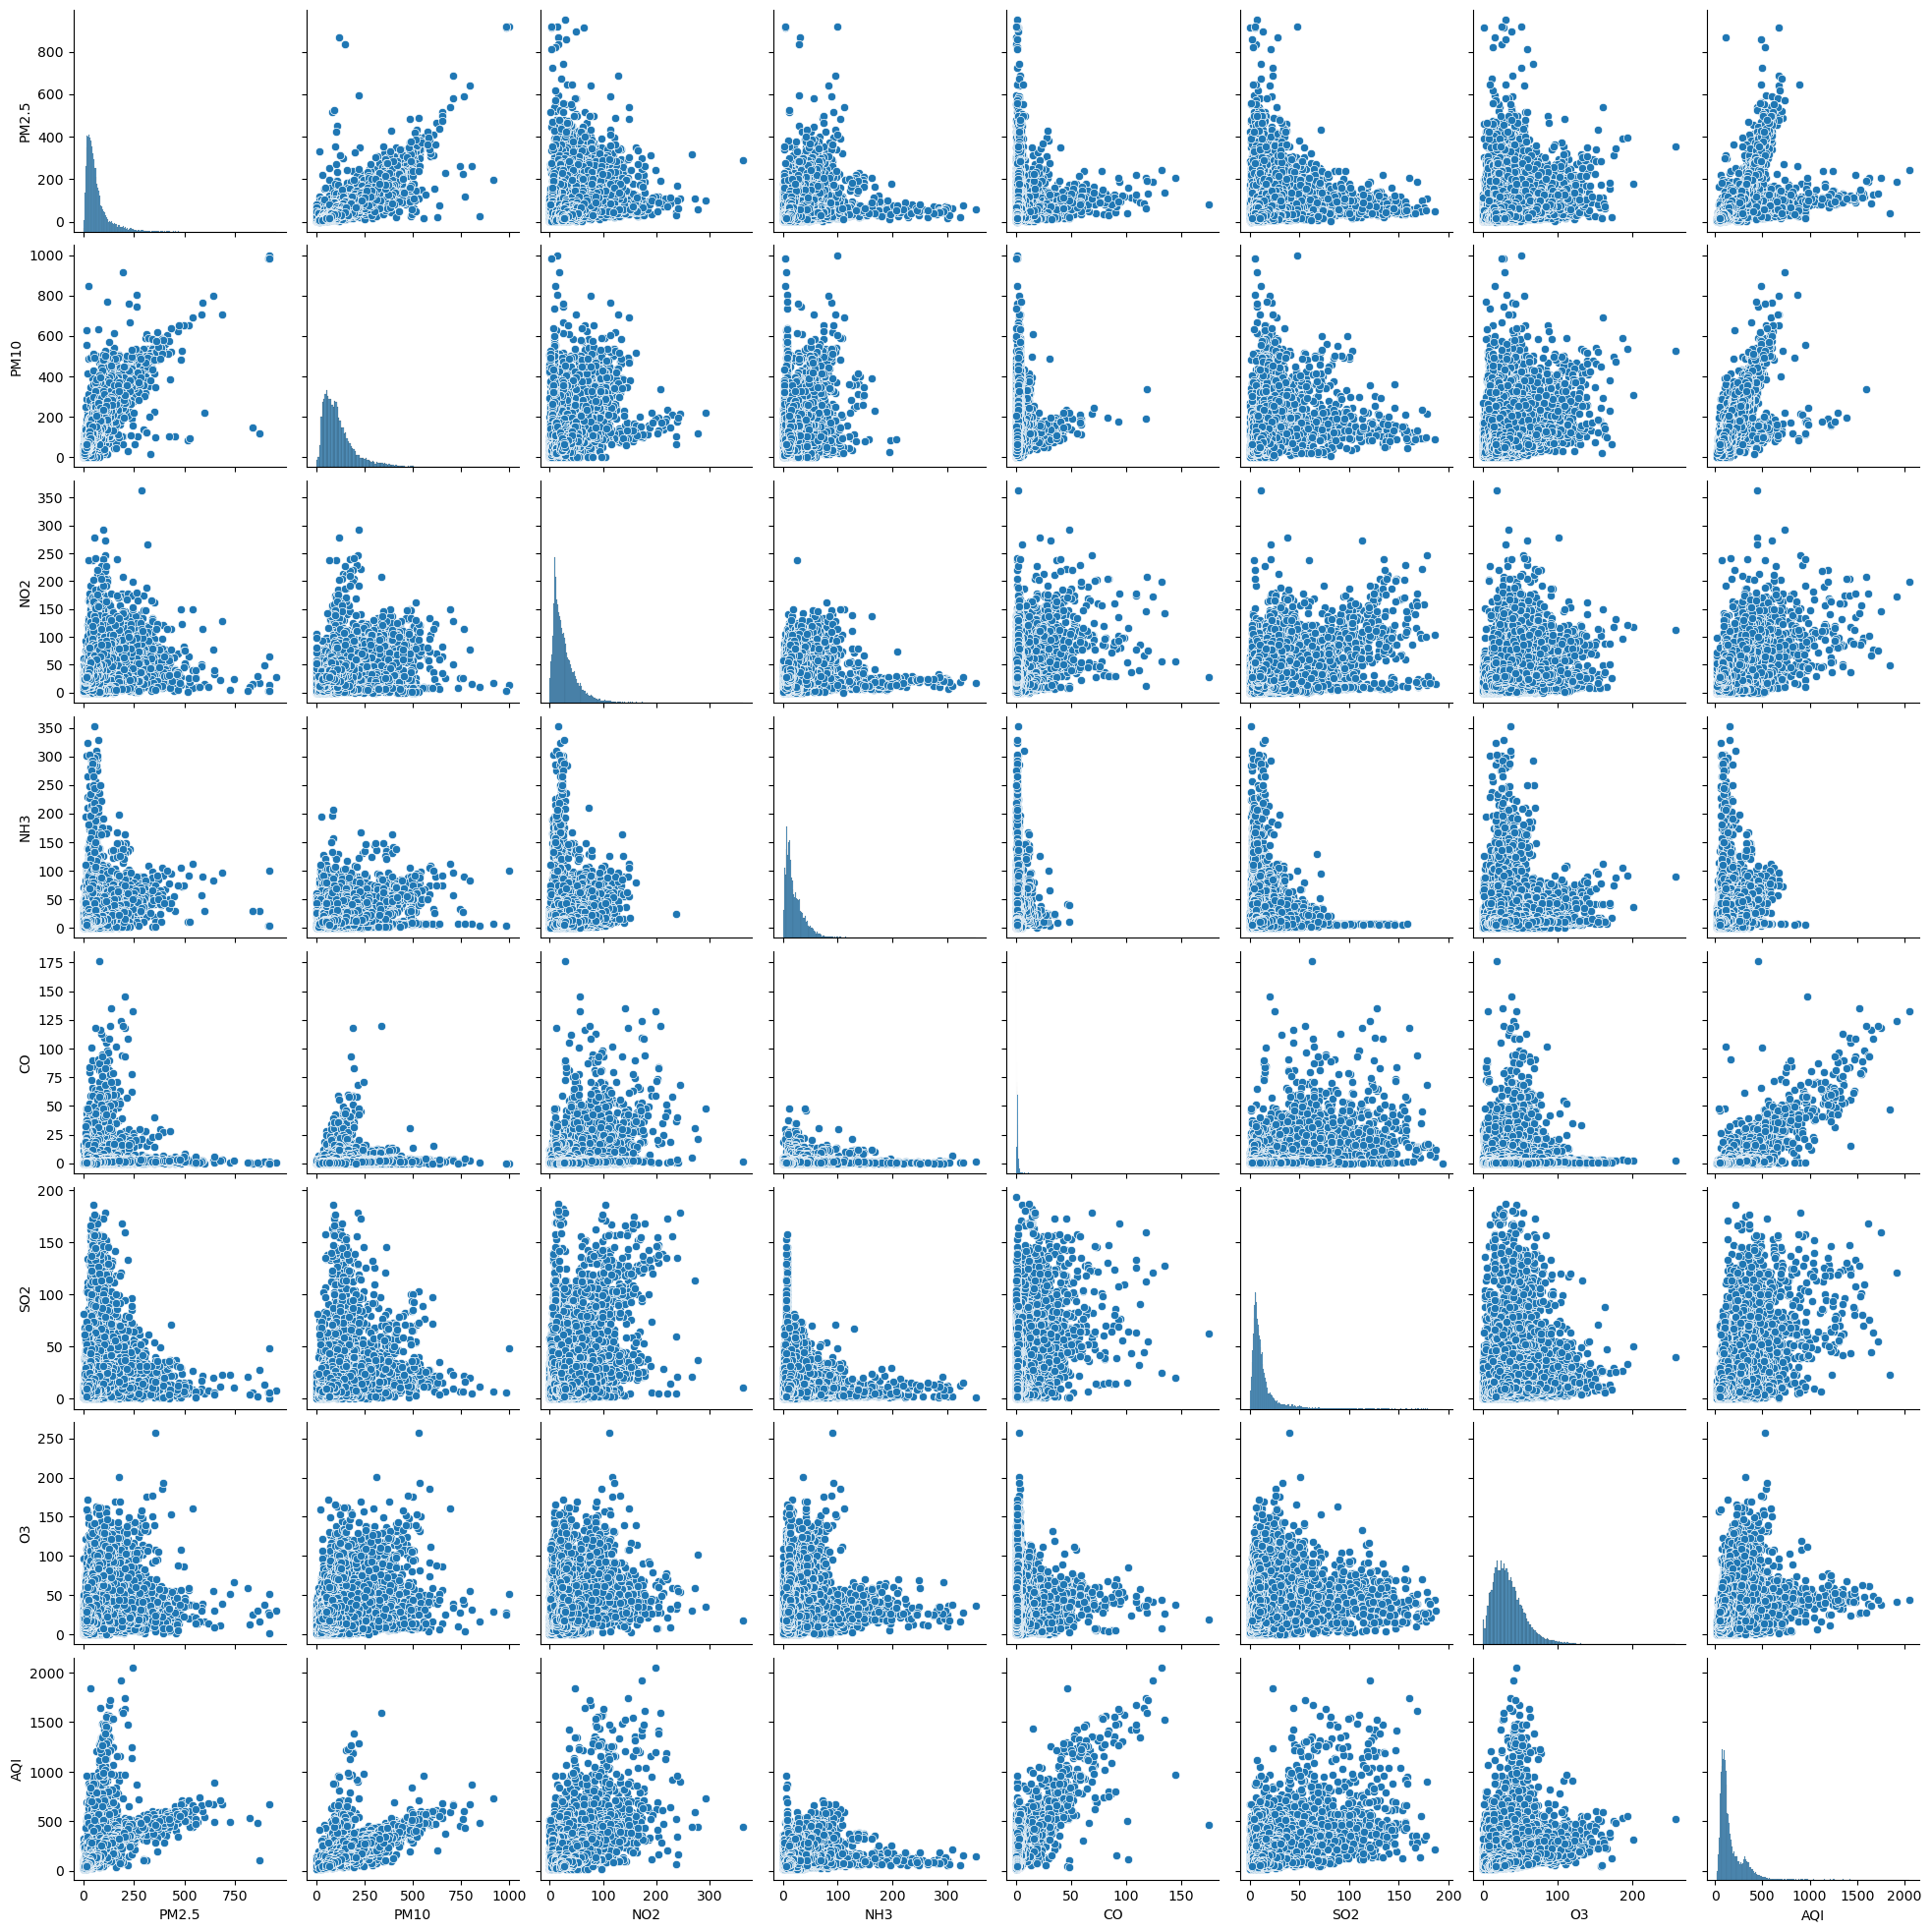

In [13]:
sns.pairplot(df)

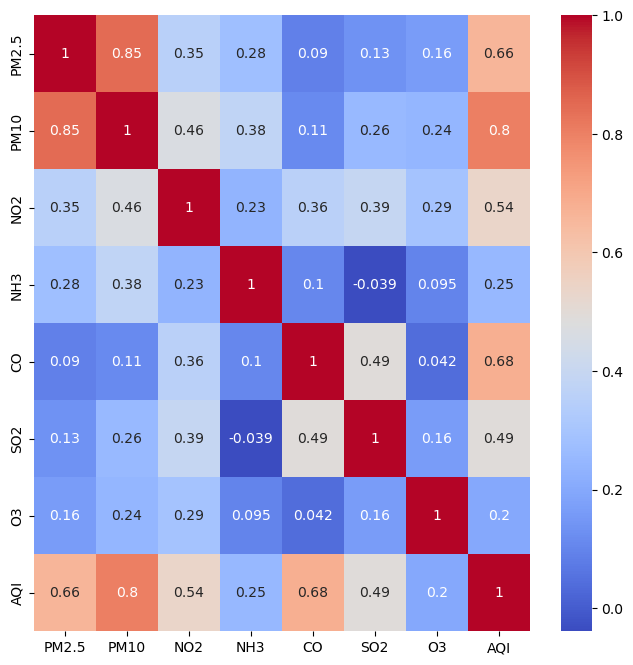

In [14]:
# plt.figure(figsize=(8,8))
# sns.heatmap(df.corr(),annot=True)
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()


# EDA Handling Missing Values

In [15]:
df.isnull().sum()

City         0
PM2.5     4598
PM10     11140
NO2       3585
NH3      10328
CO        2059
SO2       3854
O3        4022
AQI       4681
dtype: int64

In [16]:
pmean=df["PM2.5"].mean()
df["PM2.5"].fillna(pmean,inplace=True)

In [17]:
df.isnull().sum()

City         0
PM2.5        0
PM10     11140
NO2       3585
NH3      10328
CO        2059
SO2       3854
O3        4022
AQI       4681
dtype: int64

In [18]:
pmmean=df["PM10"].mean()
df["PM10"].fillna(pmmean,inplace=True)

In [19]:
nomean=df["NO2"].mean()
df["NO2"].fillna(nomean,inplace=True)

In [20]:
nhmean=df["NH3"].mean()
df["NH3"].fillna(nhmean,inplace=True)

In [21]:
cmean=df["CO"].mean()
df["CO"].fillna(cmean,inplace=True)

In [22]:
smean=df["SO2"].mean()
df["SO2"].fillna(smean,inplace=True)

In [23]:
omean=df["O3"].mean()
df["O3"].fillna(omean, inplace=True)

In [24]:
amean=df["AQI"].mean()
df["AQI"].fillna(amean,inplace=True)

In [25]:
df.isna().sum()

City     0
PM2.5    0
PM10     0
NO2      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

# Dividing the Data into X and Y

In [26]:
df.shape

(29531, 9)

In [27]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO2', 'NH3', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')

In [28]:
x=df.iloc[:,1:8].values #independent features
y=df.iloc[:,-1].values # dependent features


In [29]:
x

array([[ 67.45057795, 118.12710293,  18.22      , ...,   0.92      ,
         27.64      , 133.36      ],
       [ 67.45057795, 118.12710293,  15.69      , ...,   0.97      ,
         24.55      ,  34.06      ],
       [ 67.45057795, 118.12710293,  19.3       , ...,  17.4       ,
         29.07      ,  30.7       ],
       ...,
       [ 22.91      ,  65.73      ,  29.53      , ...,   0.48      ,
          8.42      ,  30.96      ],
       [ 16.64      ,  49.97      ,  29.26      , ...,   0.52      ,
          9.84      ,  28.3       ],
       [ 15.        ,  66.        ,  26.85      , ...,   0.59      ,
          2.1       ,  17.05      ]])

In [30]:
# x.isnull().sum()

In [31]:
# x.columns

In [32]:
y

array([166.46358149, 166.46358149, 166.46358149, ...,  68.        ,
        54.        ,  50.        ])

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.4,random_state=0)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
linreg=LinearRegression()

In [37]:
linreg.fit(x_train,y_train)

LinearRegression()

In [38]:
linreg.coef_

array([ 0.95679254,  0.28460092,  0.50421071, -0.05840891, 10.03507113,
        0.64905007,  0.17701841])

In [39]:
linreg.intercept_

16.956747266358377

In [40]:
y_pred=linreg.predict(x_test)
y_pred

array([383.10059762, 165.61077916, 144.93234056, ..., 117.57249681,
       260.20167026,  87.59164937])

In [41]:
y_pred.shape

(11813,)

# Model Evaluation

In [42]:
x=df.iloc[:,1:8]
y=df.iloc[:,-1]

In [43]:
x.columns

Index(['PM2.5', 'PM10', 'NO2', 'NH3', 'CO', 'SO2', 'O3'], dtype='object')

In [45]:
y

0        166.463581
1        166.463581
2        166.463581
3        166.463581
4        166.463581
            ...    
29526     41.000000
29527     70.000000
29528     68.000000
29529     54.000000
29530     50.000000
Name: AQI, Length: 29531, dtype: float64

In [46]:
y.isnull().sum()

0

In [47]:
coef_df=pd.DataFrame(linreg.coef_,x.columns,columns=["Coefficient"])
coef_df

,Coefficient
PM2.5,0.956793
PM10,0.284601
NO2,0.504211
NH3,-0.058409
CO,10.035071
SO2,0.649050
O3,0.177018


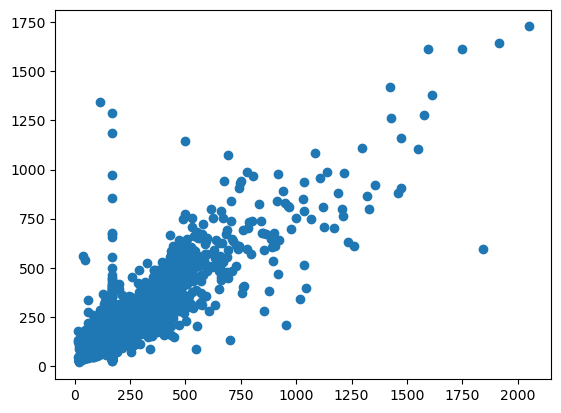

In [48]:
plt.scatter(y_test,y_pred)

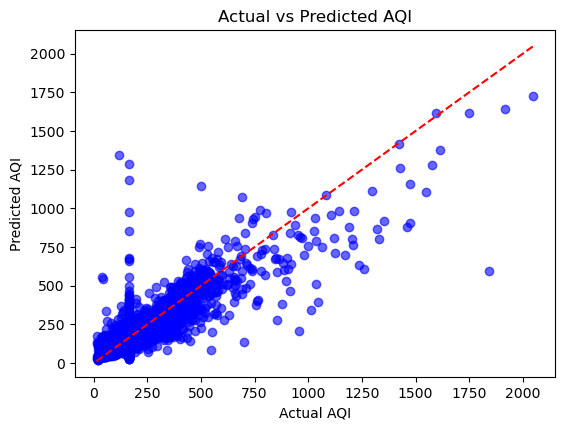

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
# prediction already hai X_test ke liye
y_pred = linreg.predict(x_test)
# Scatter Plot
plt.figure(figsize=(6.2,4.5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.show()

<Axes: ylabel='Density'>

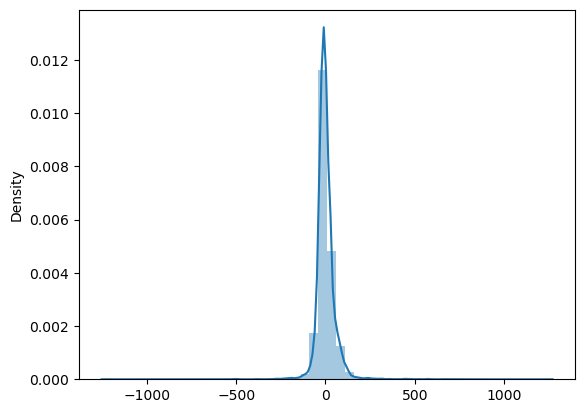

In [50]:
sns.distplot((y_test-y_pred),bins=50)

In [51]:
from sklearn import metrics

In [52]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 32.08910163216912
MSE: 3309.4181312718188
RMSE: 57.52754237121397


In [53]:
# print(f"R-squared:-{r2_score(y_test,y_pred)}")

In [54]:
print("Coefficient of determination R^2 <-- on train set: {}".format(linreg.score(x_train, y_train)))


Coefficient of determination R^2 <-- on train set: 0.7893500255794627


In [55]:
import pickle

In [56]:
# open a file, where you ant to store the data
file = open('regression_model_ipy_3.pkl', 'wb')
# dump information to that file
pickle.dump(linreg, file)

In [57]:
file

<_io.BufferedWriter name='regression_model_ipy_3.pkl'>